In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.io import fits

import csv

# This notebook compares the selection of sources as provided
# by the catalog, as used by Erik and as calculated by our own
# It also provides us with a first "feel" of the data

In [2]:
# We import the data in order to be able to plot the sources later:
I_hdu = fits.open(get_pkg_data_filename(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85/Abell_85_aFix_pol_I_Farcsec_fcube_cor.fits'))[0]
I_cube = I_hdu.data[0]
Q_hdu = fits.open(get_pkg_data_filename(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85/Abell_85_aFix_pol_Q_Farcsec_fcube_cor.fits'))[0]
Q_cube = Q_hdu.data[0]
U_hdu = fits.open(get_pkg_data_filename(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85/Abell_85_aFix_pol_U_Farcsec_fcube_cor.fits'))[0]
U_cube = U_hdu.data[0]
V_hdu = fits.open(get_pkg_data_filename(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85/Abell_85_aFix_pol_V_Farcsec_fcube_cor.fits'))[0]
V_cube = V_hdu.data[0]

# We also calculate the frequency mean of all channels to get better SNR
# However, this might also weaken polarized sources due to depolarization
I_freqmean = np.nanmean(I_cube, axis=0)
Q_freqmean = np.nanmean(Q_cube, axis=0)
U_freqmean = np.nanmean(U_cube, axis=0)
V_freqmean = np.nanmean(V_cube, axis=0)


I_wcs = WCS(I_hdu.header)
Q_wcs = WCS(Q_hdu.header)
U_wcs = WCS(U_hdu.header)
V_wcs = WCS(V_hdu.header)

print(I_cube.shape)

(12, 3617, 3617)


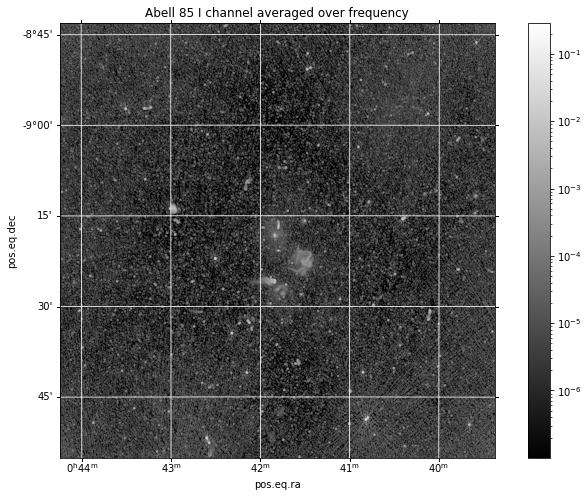

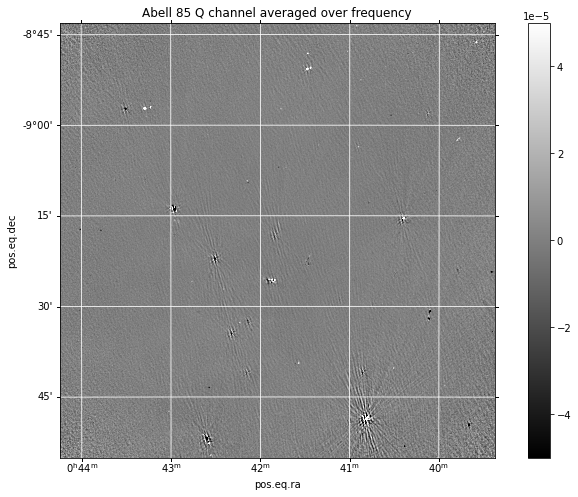

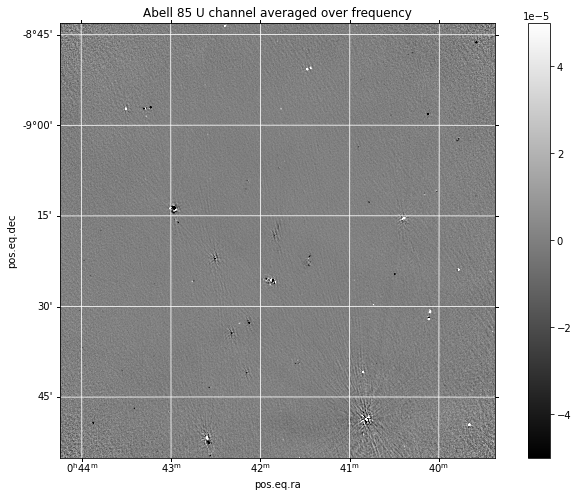

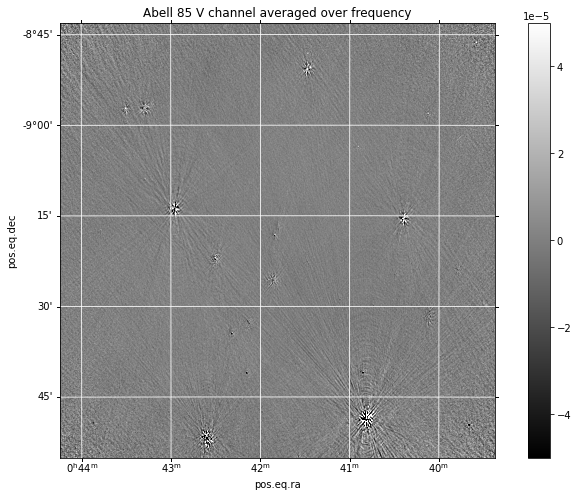

In [3]:
# We plot the frequency mean of all channels to get a good first impression
plt.figure(figsize=(12,8))
plt.subplot(projection=I_wcs, slices=('x', 'y', 0, 0))
plt.title('Abell 85 I channel averaged over frequency')
plt.imshow(I_freqmean.clip(min=0.0000001), cmap='gray', norm=colors.LogNorm())
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.savefig('ACO85_I_Freqmean.pdf', dpi=200)

plt.figure(figsize=(12,8))
plt.subplot(projection=Q_wcs, slices=('x', 'y', 0, 0))
plt.title('Abell 85 Q channel averaged over frequency')
plt.imshow(Q_freqmean, cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.savefig('ACO85_Q_Freqmean.pdf', dpi=200)

plt.figure(figsize=(12,8))
plt.subplot(projection=U_wcs, slices=('x', 'y', 0, 0))
plt.title('Abell 85 U channel averaged over frequency')
plt.imshow(U_freqmean, cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.savefig('ACO85_U_Freqmean.pdf', dpi=200)

plt.figure(figsize=(12,8))
plt.subplot(projection=V_wcs, slices=('x', 'y', 0, 0))
plt.title('Abell 85 V channel averaged over frequency')
plt.imshow(V_freqmean, cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.savefig('ACO85_V_Freqmean.pdf', dpi=200)

['MKTCS J003922.60-095137.3' 'MKTCS J003922.70-094958.1'
 'MKTCS J003922.98-093504.0' ... 'MKTCS J004414.58-094806.7'
 'MKTCS J004414.59-094131.2' 'MKTCS J004414.65-094157.9']
[ 9.8442  9.8446  9.8458 ... 11.0608 11.0608 11.061 ]
[-9.8604 -9.8328 -9.5845 ... -9.8019 -9.692  -9.6994]
(array([False, False, False, ..., False, False, False]),)


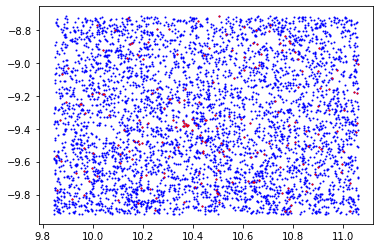

In [4]:
# We have two kinds of catalogs, one provided by MKT team with only single gaussians (no resolved sources)
# and with detections deleted due to artifacts around bright sources. We first import this catalog
# There is also a catalog with raw output from pyBDSF where these sources aren't filtered, we will look at this later
source_hdu = fits.open(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85\Abell_85_sources.fits')[1]
source_table = source_hdu.data
source_header = source_hdu.header

print(source_table['# Source_name'])
print(source_table['RA_deg'])
print(source_table['DEC_deg'])

# We select on brightness to see which are bright sources
flux_mask = tuple([source_table['Stot_mJy'] >= 0.5])
source_table_fluxmasked = source_table[flux_mask]
print(flux_mask)

plt.scatter(source_table['RA_deg'], source_table['DEC_deg'], s=1, color='blue')
plt.scatter(source_table_fluxmasked['RA_deg'], source_table_fluxmasked['DEC_deg'], s=1, color='red')
plt.savefig('sources.pdf')

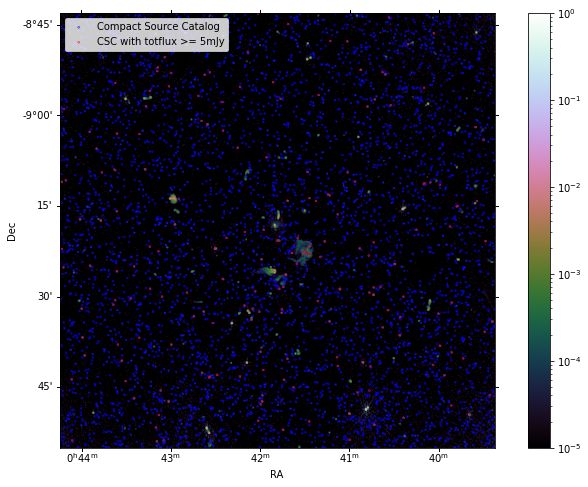

In [5]:
# We overplot the intensity data with these sources from MKT team
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=I_wcs, slices=('x', 'y', 0, 0))
plt.imshow(I_freqmean.clip(min=1e-5), origin='lower', cmap='cubehelix', norm=colors.LogNorm(vmin=1e-5, vmax=1))
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
plt.scatter(source_table['RA_deg'], source_table['DEC_deg'], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='Compact Source Catalog')
plt.scatter(source_table_fluxmasked['RA_deg'], source_table_fluxmasked['DEC_deg'], color='red', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='CSC with totflux >= 5mJy')
plt.ylim(0, I_freqmean.shape[0])
plt.xlim(0, I_freqmean.shape[1])
plt.legend(loc='upper left')
plt.savefig('ACO85_I_Freqmean_brightsources.pdf', dpi=500)

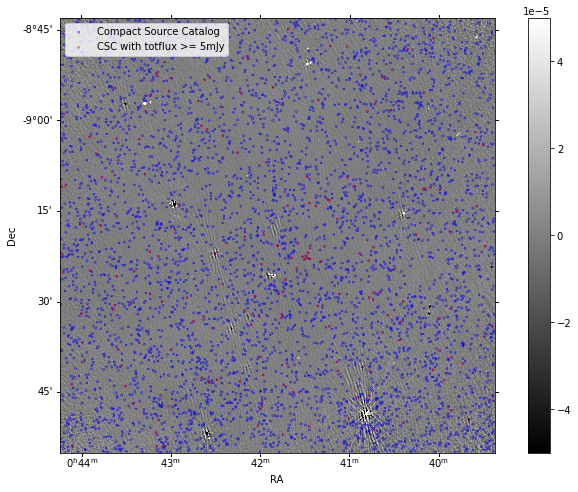

In [6]:
# And next also on the Q channel image
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=I_wcs, slices=('x', 'y', 0, 0))
plt.imshow(Q_freqmean, origin='lower', cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
plt.scatter(source_table['RA_deg'], source_table['DEC_deg'], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='Compact Source Catalog')
plt.scatter(source_table_fluxmasked['RA_deg'], source_table_fluxmasked['DEC_deg'], color='red', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='CSC with totflux >= 5mJy')
plt.ylim(0, I_freqmean.shape[0])
plt.xlim(0, I_freqmean.shape[1])
plt.legend(loc='upper left')
plt.savefig('ACO85_Q_Freqmean_brightsources.pdf', dpi=500)

In [7]:
# We will now look at the whole output from BDSF, this is in csv
# instead of FITS so requires some extra delimiter work:

# file name
filename = "Abell_85_ALLsources.csv"
lists_from_csv = []
ALLsource_type_list = []

with open(filename, newline='\n') as f:
    reader = csv.reader(f, delimiter=';', quoting=csv.QUOTE_NONE)
    n = 0
    for row in reader:
        if n>4:
            # Needed because of how the CSV is formatted...
            row[2] = float(row[2].replace(".", ""))/1e14
            row[4] = float(row[4].replace(".", ""))/1e14
            row[10] = float(row[10].replace(".", ""))/1e14
            row[12] = float(row[12].replace(".", ""))/1e14
            row[18] = float(row[18].replace(".", ""))/1e14
            row[19] = float(row[19].replace(".", ""))/1e14
            row[24] = float(row[24].replace(".", ""))/1e14
            row[25] = float(row[25].replace(".", ""))/1e14
            row[30] = float(row[30].replace(".", ""))/1e14
            row[31] = float(row[31].replace(".", ""))/1e14
            row[36] = float(row[36].replace(".", ""))/1e14
            row[37] = float(row[37].replace(".", ""))/1e14
            ALLsource_type_list.append(row[-1])
        lists_from_csv.append(row[:-1])
        n += 1

ALLsource_header = lists_from_csv[4]
ALLsource_table = np.array(lists_from_csv[5:], dtype='float')
ALLsource_type = np.array(ALLsource_type_list)

# We make masks based on type, S is single gaussian, C is single gaussian in larger "island", M is multiple gaussians
Type_S_mask = [ALLsource_type == 'S']
Type_C_mask = tuple([ALLsource_type == 'C'])
Type_M_mask = tuple([ALLsource_type == 'M'])

print(ALLsource_header)
print(ALLsource_table[0])

['#Source_id', 'Isl_id', 'RA', 'E_RA', 'DEC', 'E_DEC', 'Total_flux', 'E_Total_flux', 'Peak_flux', 'E_Peak_flux', 'RA_max', 'E_RA_max', 'DEC_max', 'E_DEC_max', 'Maj', 'E_Maj', 'Min', 'E_Min', 'PA', 'E_PA', 'Maj_img_plane', 'E_Maj_img_plane', 'Min_img_plane', 'E_Min_img_plane', 'PA_img_plane', 'E_PA_img_plane', 'DC_Maj', 'E_DC_Maj', 'DC_Min', 'E_DC_Min', 'DC_PA', 'E_DC_PA', 'DC_Maj_img_plane', 'E_DC_Maj_img_plane', 'DC_Min_img_plane', 'E_DC_Min_img_plane', 'DC_PA_img_plane', 'E_DC_PA_img_plane', 'Isl_Total_flux', 'E_Isl_Total_flux', 'Isl_rms', 'Isl_mean', 'Resid_Isl_rms', 'Resid_Isl_mean']
[ 0.00000000e+00  0.00000000e+00  1.10602136e+01  4.91735830e-05
 -9.91625407e+00  7.74279367e-05  2.09472424e-04  2.02841693e-05
  1.57175966e-04  9.55140292e-06  1.10602136e+01  4.91735830e-05
 -9.91625407e+00  7.74279367e-05  2.70654681e-03  1.84160549e-04
  2.07955337e-03  1.12862865e-04  1.01405430e+01  1.06316665e+01
  2.70634727e-03  1.84160549e-04  2.07947970e-03  1.12862865e-04
  1.02451423e+0

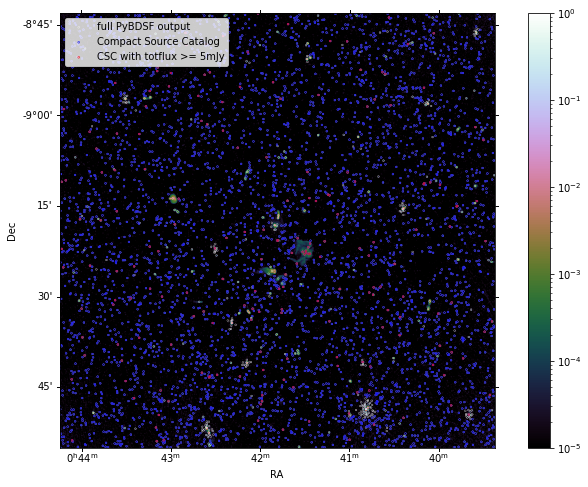

In [8]:
# We plot the full BDSF output on intensity data together with the compact source catalog:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=I_wcs, slices=('x', 'y', 0, 0))
plt.imshow(I_freqmean.clip(min=1e-5), origin='lower', cmap='cubehelix', norm=colors.LogNorm(vmin=1e-5, vmax=1))
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
plt.scatter(ALLsource_table[:,2], ALLsource_table[:,4], color='white', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='full PyBDSF output')
plt.scatter(source_table['RA_deg'], source_table['DEC_deg'], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='Compact Source Catalog')
plt.scatter(source_table_fluxmasked['RA_deg'], source_table_fluxmasked['DEC_deg'], color='red', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='CSC with totflux >= 5mJy')
plt.ylim(0, I_freqmean.shape[0])
plt.xlim(0, I_freqmean.shape[1])
plt.legend(loc='upper left')
plt.savefig('ACO85_I_Freqmean_brightsources.pdf', dpi=500)

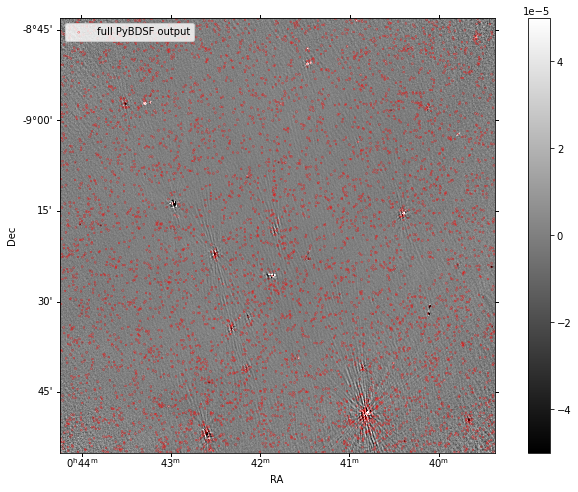

In [9]:
# And we do same for Q pol data:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=I_wcs, slices=('x', 'y', 0, 0))
plt.imshow(Q_freqmean, origin='lower', cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
plt.scatter(ALLsource_table[:,2], ALLsource_table[:,4], color='white', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='full PyBDSF output')
plt.scatter(source_table['RA_deg'], source_table['DEC_deg'], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='Compact Source Catalog')
plt.scatter(source_table_fluxmasked['RA_deg'], source_table_fluxmasked['DEC_deg'], color='red', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.5, label='CSC with totflux >= 5mJy')
plt.ylim(0, I_freqmean.shape[0])
plt.xlim(0, I_freqmean.shape[1])
plt.legend(loc='upper left')
plt.savefig('ACO85_Q_Freqmean_brightsources.pdf', dpi=500)

In [10]:
# We also want to compare al this with what Erik has selected in Abell 85, so we import his source selection:
source_Erik_hdu = fits.open(r'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden\Bachelor 3\BRP\Meerkat_Data\Abell 85\Abell_85_sources_Erik.fits')[1]
source_Erik_table = source_Erik_hdu.data
source_Erik_header = source_Erik_hdu.header
print(source_Erik_header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  315 / width of table in bytes                        NAXIS2  =                   18 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   35 / number of columns                              EXTNAME = 'C:\Users\woutg\OneDrive - Universiteit Leiden\Universiteit Leiden...'TTYPE1  = 'RA      '           / label for column 1                             TFORM1  = 'D       '           / format for column 1                            TTYPE2  = 'DEC     '           / label for column 2                             TFORM2  = 'D       '           / format 

C:\Users\woutg\AppData\Local\Temp\ipykernel_15236\2811798429.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.scatter(ALLsource_table[:,2][Type_S_mask], ALLsource_table[:,4][Type_S_mask], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='Full catalog sources - Type S')


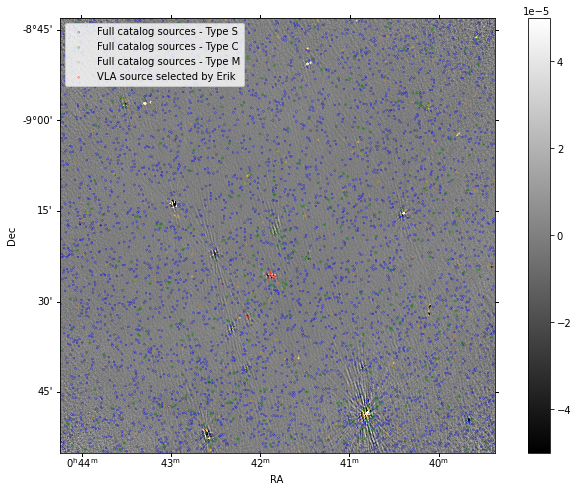

In [11]:
# We make a final plot comparing all source catalogs with the polarization data:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=I_wcs, slices=('x', 'y', 0, 0))
plt.imshow(Q_freqmean, origin='lower', cmap='gray', vmin=-0.00005, vmax=0.00005)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()
plt.scatter(ALLsource_table[:,2][Type_S_mask], ALLsource_table[:,4][Type_S_mask], color='blue', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='Full catalog sources - Type S')
plt.scatter(ALLsource_table[:,2][Type_C_mask], ALLsource_table[:,4][Type_C_mask], color='green', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='Full catalog sources - Type C')
plt.scatter(ALLsource_table[:,2][Type_M_mask], ALLsource_table[:,4][Type_M_mask], color='orange', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='Full catalog sources - Type M')
plt.scatter(source_Erik_table['RA'], source_Erik_table['DEC'], color='red', transform=ax.get_transform('world'), s=3, facecolors='none', linewidth=0.3, label='VLA source selected by Erik')
plt.ylim(0, I_freqmean.shape[0])
plt.xlim(0, I_freqmean.shape[1])
plt.legend(loc='upper left')
plt.savefig('ACO85_Q_Freqmean_Eriksources.pdf', dpi=500)